## Trade analysis example

In [1]:
import tools.log_parser as log_parser
import tools.backtester as backtester
import tools.trade_analyzer as trade_analyzer
from datamodel import *

import sys
import collections
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

from dataclasses import dataclass

In [2]:
sns.set_theme(style="whitegrid")

### Import logs

(from a prober solution)

In [3]:
LOG_PATH = "thien-work/03_19_combined_trader_9.log"

In [4]:
log = log_parser.parse_log(LOG_PATH, parse_trader_log_as_object=True)

`trade_analyzer.annotate_log` adds some useful trade information to the dataframes (`activity_df`, `trades_df`) in `log`.

It adds the following columns:
- `position` in `activity_df`: the position at the start of the timestep, before any orders are submitted.
- `submission_involved` in `trades_df`: whether your submission was involved in the trade.
- `market_order_filled` in `trades_df`: the quantity of trades in that transaction that were filled from market order (type 3 trades).

In [5]:
trade_analyzer.annotate_log(log)

## Analysis of Starfruit

In [6]:
starfruit_df = log.activity_df[log.activity_df["product"] == "STARFRUIT"]

Using `position` in the `activity_df`

c:\Users\Thien\miniconda3\envs\kaggle\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Thien\miniconda3\envs\kaggle\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Thien\miniconda3\envs\kaggle\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Thien\miniconda3\envs\kaggle\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

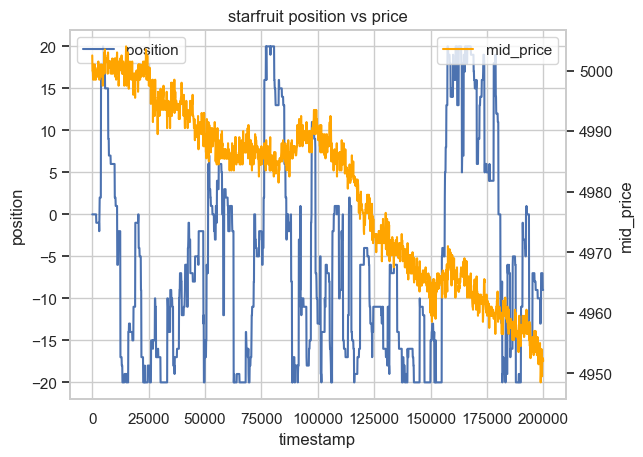

In [7]:
sns.lineplot(data=starfruit_df, x="timestamp", y="position", errorbar=None, label="position")
plt.legend(loc="upper left")
plt.title("starfruit position vs price")
ax2=plt.twinx()
sns.lineplot(data=starfruit_df, x="timestamp", y="mid_price", errorbar=None, label="mid_price", ax=ax2, color="orange")
ax2.grid(False)
ax2.legend(loc="upper right")

### Looking at `trades_df`

In [8]:
starfruit_trades_df = log.trades_df[log.trades_df.symbol=="STARFRUIT"]
display(starfruit_trades_df.describe(), starfruit_trades_df.head(5))

,timestamp,price,quantity,market_order_filled
count,754.000000,754.000000,754.000000,413.000000
mean,100570.026525,4979.907162,2.919098,1.520581
std,56040.753557,14.124635,3.312030,2.053339
min,0.000000,4948.000000,0.000000,0.000000
25%,52525.000000,4967.000000,1.000000,0.000000
50%,99800.000000,4984.000000,1.000000,1.000000
75%,147750.000000,4990.750000,4.000000,2.000000
max,199600.000000,5003.000000,18.000000,10.000000


,timestamp,buyer,seller,symbol,currency,price,quantity,submission_involved,market_order_filled
0,0,,,STARFRUIT,SEASHELLS,5003,1,NaN,NaN
2,0,,,STARFRUIT,SEASHELLS,5003,13,NaN,NaN
6,1700,,SUBMISSION,STARFRUIT,SEASHELLS,5002,1,True,0.0
7,1700,,,STARFRUIT,SEASHELLS,5002,8,NaN,NaN
10,1900,,,STARFRUIT,SEASHELLS,5002,1,NaN,NaN


In [9]:
own_starfruit_trades_df = starfruit_trades_df[starfruit_trades_df["submission_involved"] == True]
own_starfruit_trades_df.head()

,timestamp,buyer,seller,symbol,currency,price,quantity,submission_involved,market_order_filled
6,1700,,SUBMISSION,STARFRUIT,SEASHELLS,5002,1,True,0.0
15,3000,,SUBMISSION,STARFRUIT,SEASHELLS,5002,1,True,0.0
18,3100,SUBMISSION,,STARFRUIT,SEASHELLS,4998,2,True,0.0
20,3200,SUBMISSION,,STARFRUIT,SEASHELLS,4997,2,True,0.0
22,3800,SUBMISSION,,STARFRUIT,SEASHELLS,4998,14,True,0.0


In [17]:
starfruit_buys = own_starfruit_trades_df[own_starfruit_trades_df["buyer"] == "SUBMISSION"]
starfruit_sells = own_starfruit_trades_df[own_starfruit_trades_df["seller"] == "SUBMISSION"]
display(starfruit_buys.head(), starfruit_sells.head())

,timestamp,buyer,seller,symbol,currency,price,quantity,submission_involved,market_order_filled
18,3100,SUBMISSION,,STARFRUIT,SEASHELLS,4998,2,True,0.0
20,3200,SUBMISSION,,STARFRUIT,SEASHELLS,4997,2,True,0.0
22,3800,SUBMISSION,,STARFRUIT,SEASHELLS,4998,14,True,0.0
23,3800,SUBMISSION,,STARFRUIT,SEASHELLS,4998,1,True,0.0
30,4700,SUBMISSION,,STARFRUIT,SEASHELLS,4998,3,True,3.0


,timestamp,buyer,seller,symbol,currency,price,quantity,submission_involved,market_order_filled
6,1700,,SUBMISSION,STARFRUIT,SEASHELLS,5002,1,True,0.0
15,3000,,SUBMISSION,STARFRUIT,SEASHELLS,5002,1,True,0.0
32,4800,,SUBMISSION,STARFRUIT,SEASHELLS,5001,2,True,0.0
33,5300,,SUBMISSION,STARFRUIT,SEASHELLS,5002,1,True,1.0
34,5600,,SUBMISSION,STARFRUIT,SEASHELLS,5002,2,True,2.0


### Find trades where our solution bought from the order book

In [11]:
log.trades_df.query("buyer=='SUBMISSION' and market_order_filled != 0")

,timestamp,buyer,seller,symbol,currency,price,quantity,submission_involved,market_order_filled
4,1200,SUBMISSION,,AMETHYSTS,SEASHELLS,9998,1,True,1.0
11,2000,SUBMISSION,,AMETHYSTS,SEASHELLS,9998,1,True,1.0
30,4700,SUBMISSION,,STARFRUIT,SEASHELLS,4998,3,True,3.0
37,6500,SUBMISSION,,AMETHYSTS,SEASHELLS,9998,1,True,1.0
54,8800,SUBMISSION,,AMETHYSTS,SEASHELLS,9998,1,True,1.0
...,...,...,...,...,...,...,...,...,...
1366,194300,SUBMISSION,,STARFRUIT,SEASHELLS,4953,1,True,1.0
1376,195900,SUBMISSION,,AMETHYSTS,SEASHELLS,9998,1,True,1.0
1389,198500,SUBMISSION,,AMETHYSTS,SEASHELLS,9998,10,True,10.0
1393,198800,SUBMISSION,,STARFRUIT,SEASHELLS,4949,1,True,1.0


### Plot trades over time

<Axes: xlabel='timestamp', ylabel='price'>

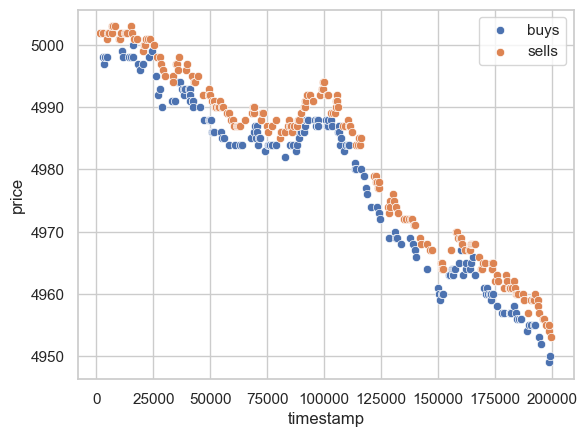

In [22]:
sns.scatterplot(data=starfruit_buys, x="timestamp", y="price", label="buys")
sns.scatterplot(data=starfruit_sells, x="timestamp", y="price", label="sells")

### Something more complicated:

In [13]:
def split_market_orders(trades_df: pd.DataFrame):
    trades_df = trades_df.copy()
    trades_df["limit_order_filled"] = trades_df["quantity"] - trades_df["market_order_filled"]
    trades_df = trades_df.melt(["timestamp", "buyer", "seller", "symbol", "currency", "price", "quantity"], value_vars=["limit_order_filled", "market_order_filled"], var_name="order_type", value_name="order_filled")
    trades_df = trades_df[trades_df["order_filled"] > 0]
    trades_df.sort_values("timestamp", inplace=True)
    return trades_df

starfruit_buy_market_orders = split_market_orders(starfruit_buys)
starfruit_sell_market_orders = split_market_orders(starfruit_sells)

display(starfruit_buy_market_orders.head(), starfruit_sell_market_orders.head())

,timestamp,buyer,seller,symbol,currency,price,quantity,order_type,order_filled
0,3100,SUBMISSION,,STARFRUIT,SEASHELLS,4998,2,limit_order_filled,2.0
1,3200,SUBMISSION,,STARFRUIT,SEASHELLS,4997,2,limit_order_filled,2.0
2,3800,SUBMISSION,,STARFRUIT,SEASHELLS,4998,14,limit_order_filled,14.0
3,3800,SUBMISSION,,STARFRUIT,SEASHELLS,4998,1,limit_order_filled,1.0
184,4700,SUBMISSION,,STARFRUIT,SEASHELLS,4998,3,market_order_filled,3.0


,timestamp,buyer,seller,symbol,currency,price,quantity,order_type,order_filled
0,1700,,SUBMISSION,STARFRUIT,SEASHELLS,5002,1,limit_order_filled,1.0
1,3000,,SUBMISSION,STARFRUIT,SEASHELLS,5002,1,limit_order_filled,1.0
2,4800,,SUBMISSION,STARFRUIT,SEASHELLS,5001,2,limit_order_filled,2.0
236,5300,,SUBMISSION,STARFRUIT,SEASHELLS,5002,1,market_order_filled,1.0
237,5600,,SUBMISSION,STARFRUIT,SEASHELLS,5002,2,market_order_filled,2.0


c:\Users\Thien\miniconda3\envs\kaggle\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Thien\miniconda3\envs\kaggle\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Thien\miniconda3\envs\kaggle\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Thien\miniconda3\envs\kaggle\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

<Axes: xlabel='timestamp', ylabel='bid_price_1'>

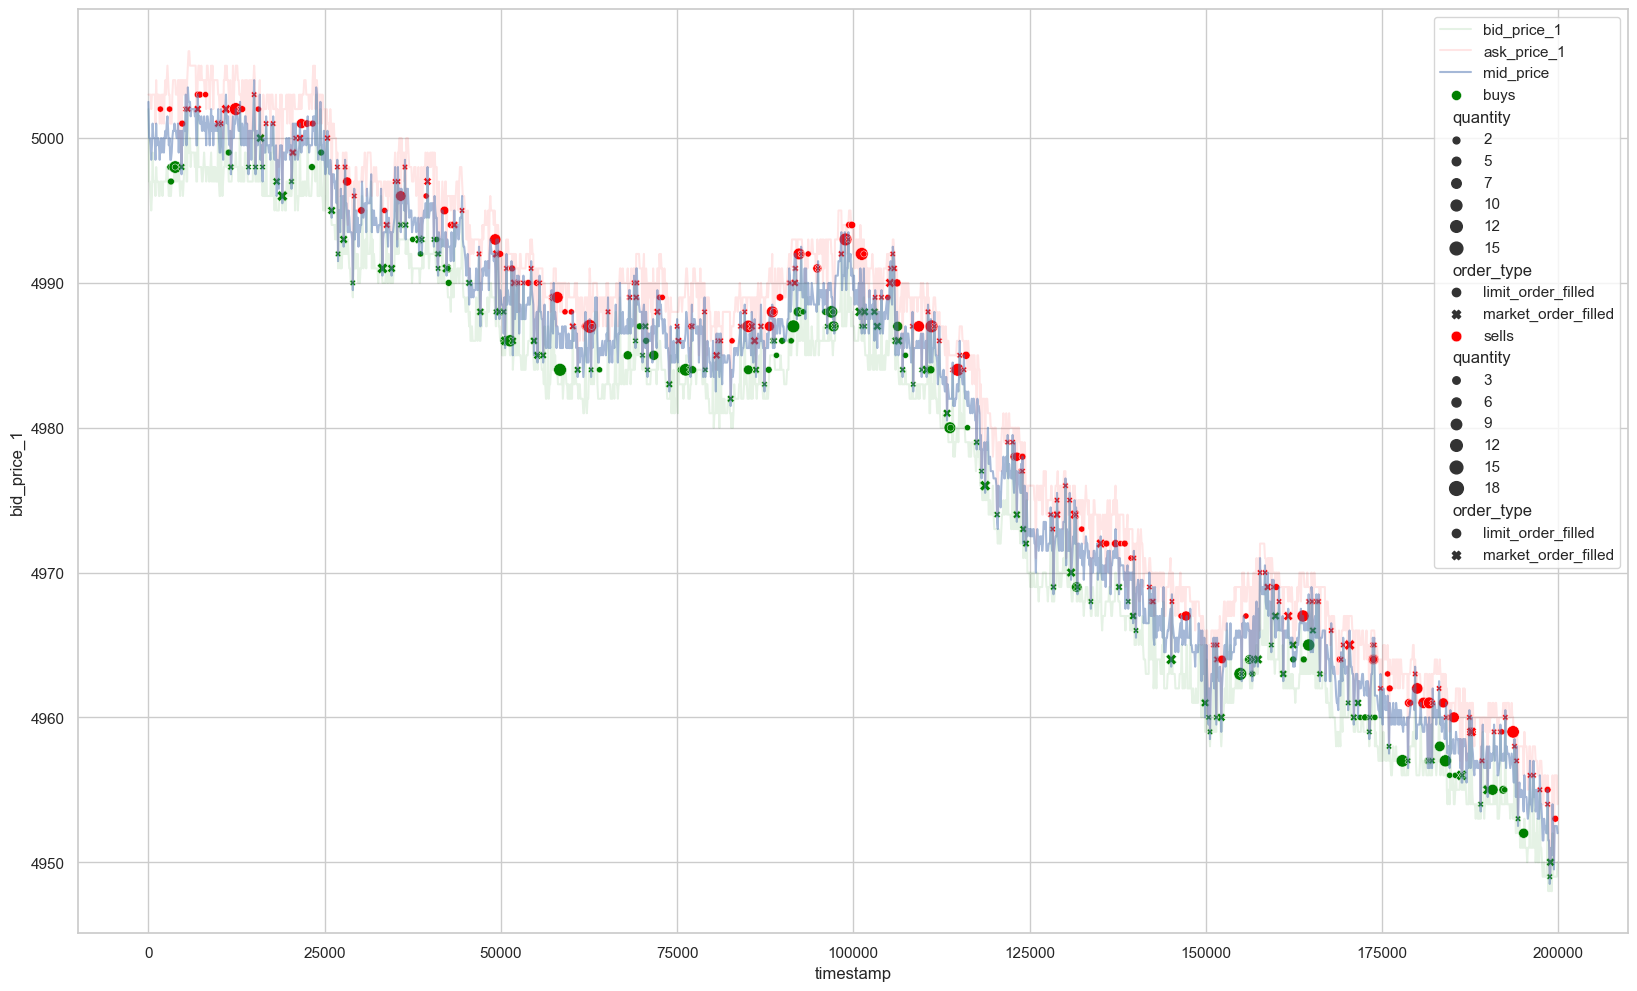

In [15]:
plt.figure(figsize=(20, 12))
sns.lineplot(data=starfruit_df, x="timestamp", y="bid_price_1", errorbar=None, label="bid_price_1", alpha=0.1, color="green")
sns.lineplot(data=starfruit_df, x="timestamp", y="ask_price_1", errorbar=None, label="ask_price_1", alpha=0.1, color="red")
sns.lineplot(data=starfruit_df, x="timestamp", y="mid_price", errorbar=None, label="mid_price", alpha=0.5)
sns.scatterplot(data=starfruit_buy_market_orders, x="timestamp", y="price", size="quantity", label="buys", color="green", style="order_type", legend="brief", size_norm=(0, 40), sizes=(15, 200))
sns.scatterplot(data=starfruit_sell_market_orders, x="timestamp", y="price", size="quantity", label="sells", color="red", style="order_type", legend="brief", size_norm=(0, 40), sizes=(15, 200))